In [1]:
import pandas as pd

In [3]:
df = pd.read_excel("dataset/final_dataset.xlsx")

In [4]:
df

,ImageId,Category,CategoryName
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,"0,28,29,31,32,4,6","shirt, blouse|collar|lapel|sleeve|pocket|jacke..."
1,0000fe7c9191fba733c8a69cfaf962b7.jpg,"1,33","top, t-shirt, sweatshirt|neckline"
2,0002ec21ddb8477e98b2cbb87ea2e269.jpg,"10,23,33",dress|shoe|neckline
3,0002f5a0ebc162ecfb73e2c91e3b8f62.jpg,"10,15,33","dress|headband, head covering, hair accessory|..."
4,0004467156e47b0eb6de4aa6479cbd15.jpg,"10,15,31,33","dress|headband, head covering, hair accessory|..."
...,...,...,...
45190,fff8d9bd5ad4354b66355dd797942b42.jpg,"10,23,33",dress|shoe|neckline
45191,fffb65463df408e308983ef743b77491.jpg,"1,18,19,23,31,33,34,6","top, t-shirt, sweatshirt|watch|belt|shoe|sleev..."
45192,fffc631acce2e28e1628de685d40c980.jpg,"10,13,18,23,24,28,31,32","dress|glasses|watch|shoe|bag, wallet|collar|sl..."
45193,fffe20b555b98c3c1f26c8dfff275cbc.jpg,"0,19,23,28,29,31,32,34,4,6","shirt, blouse|belt|shoe|collar|lapel|sleeve|po..."


In [12]:
category_distribution = df['CategoryName'].value_counts()
print(category_distribution)

CategoryName
dress|shoe|neckline                                                                                2118
dress|neckline                                                                                     1776
top, t-shirt, sweatshirt|sleeve|neckline                                                           1145
dress|shoe|sleeve|neckline                                                                         1058
dress|sleeve|neckline                                                                               931
                                                                                                   ... 
top, t-shirt, sweatshirt|belt|shoe|bag, wallet|scarf|collar|sleeve|neckline|buckle|jacket|pants       1
dress|tights, stockings|shoe|cardigan|sleeve|neckline|applique                                        1
top, t-shirt, sweatshirt|bag, wallet|umbrella|sleeve|pocket|neckline|shorts                           1
dress|tights, stockings|shoe|neckline|jacket       

In [10]:
category_distribution = df['CategoryName'].str.split('|').explode().value_counts()
category_distribution

CategoryName
neckline                                   32809
sleeve                                     29147
shoe                                       23870
dress                                      18592
top, t-shirt, sweatshirt                   15860
pocket                                     13088
pants                                      12308
collar                                      9776
jacket                                      7718
bag, wallet                                 6886
belt                                        6634
shirt, blouse                               6088
lapel                                       5873
skirt                                       5012
glasses                                     4833
zipper                                      4106
watch                                       3347
buckle                                      3084
coat                                        3079
headband, head covering, hair accessory     2977
shorts 

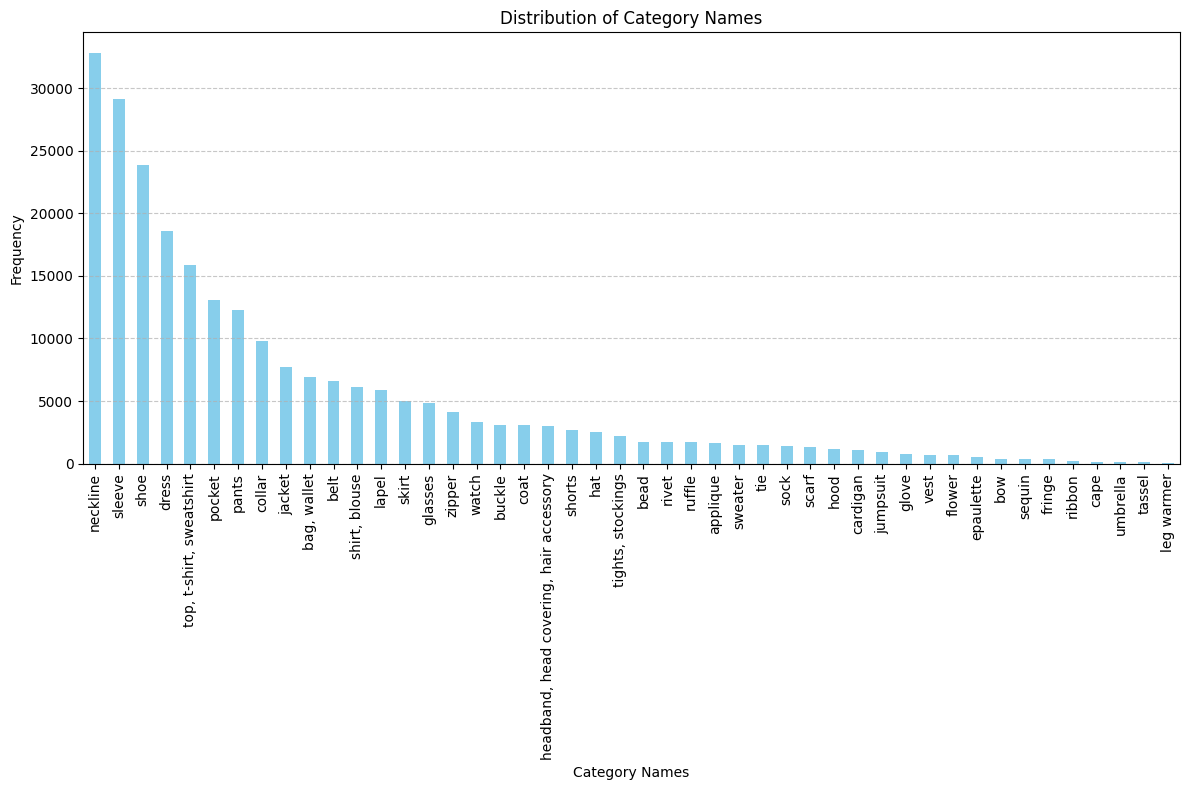

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Category Names')
plt.xlabel('Category Names')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


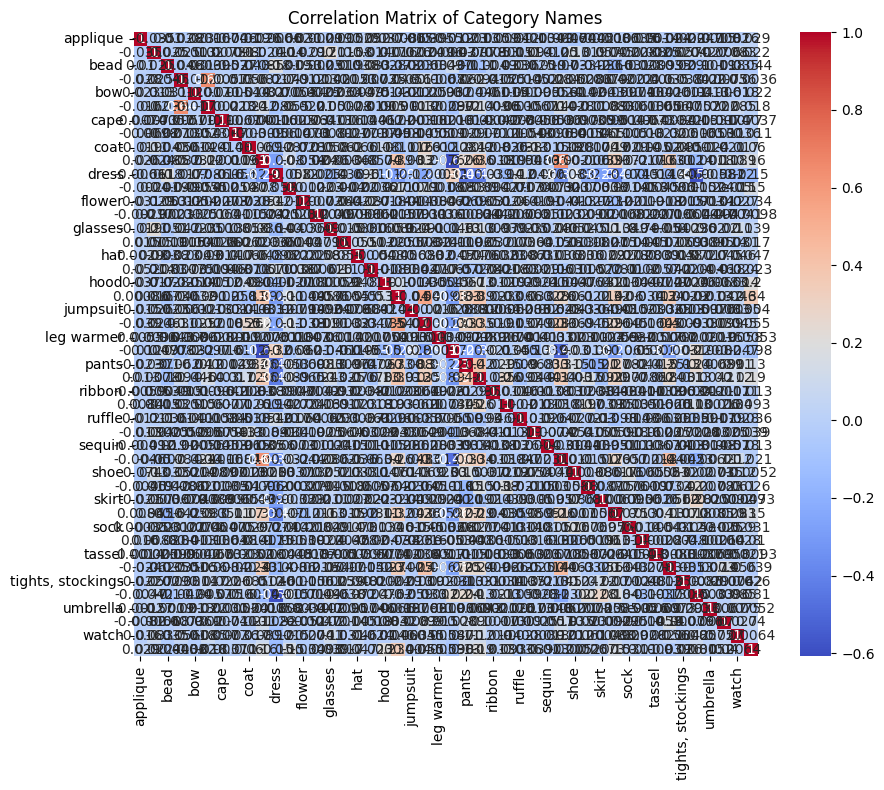

In [15]:
import seaborn as sns

corr_matrix = df['CategoryName'].str.get_dummies(sep='|').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Category Names')
plt.tight_layout()
plt.show()

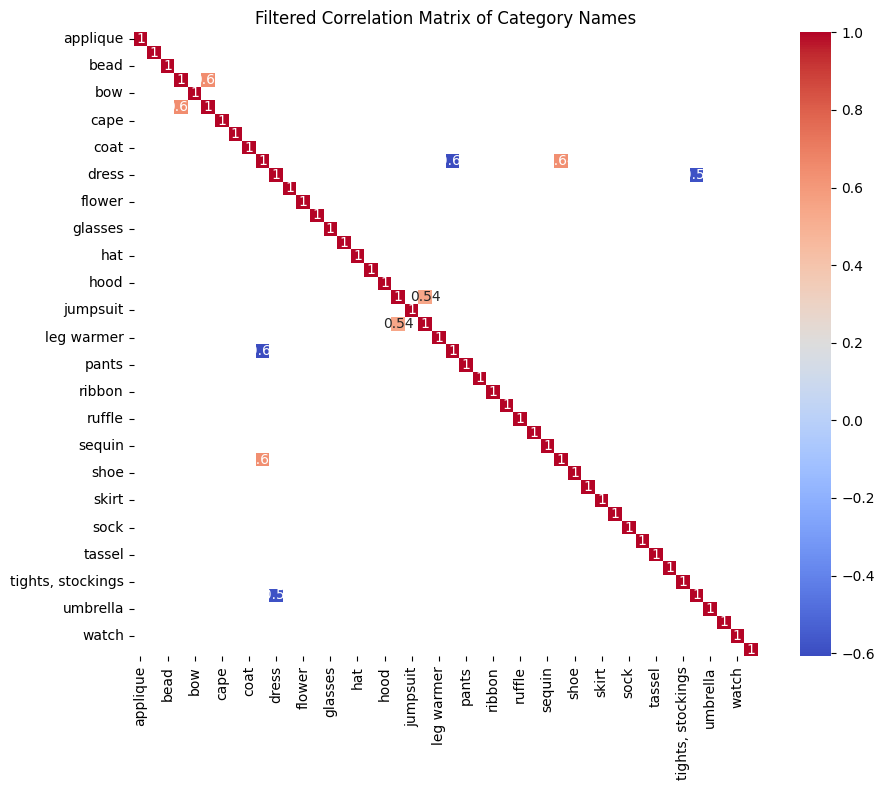

In [16]:
threshold = 0.5

# Filter the correlation matrix
filtered_corr_matrix = corr_matrix.where(abs(corr_matrix) > threshold, 0)

# Create a heatmap of the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', square=True, mask=(filtered_corr_matrix == 0))
plt.title('Filtered Correlation Matrix of Category Names')
plt.tight_layout()
plt.show()

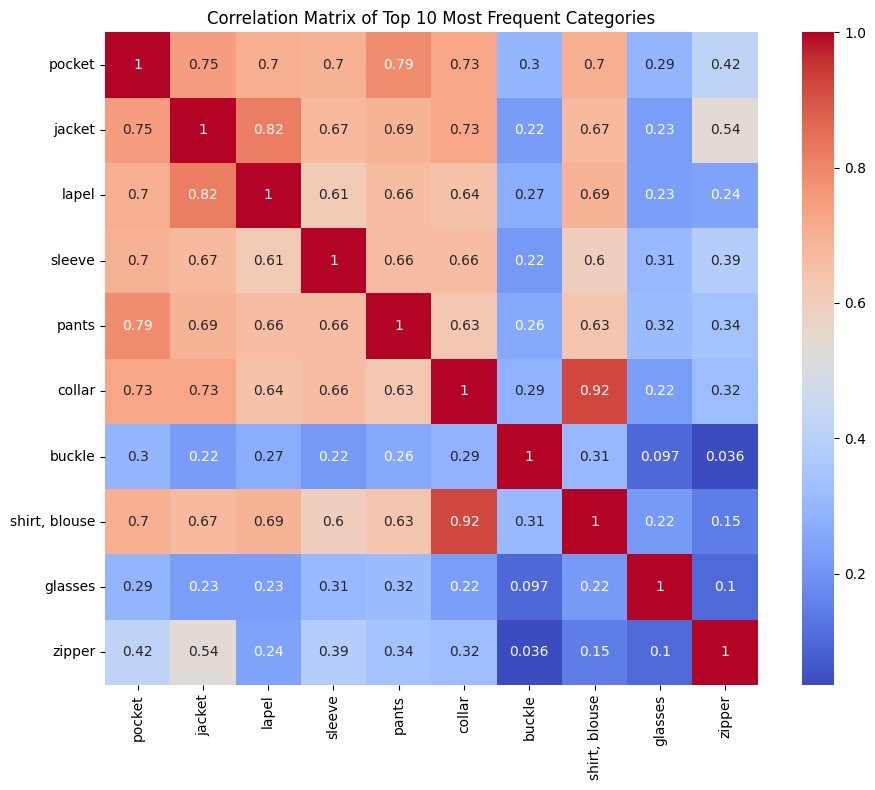

In [18]:
# Calculate the frequency of each category
category_freq = corr_matrix.sum().sort_values(ascending=False)

# Set the number of top categories to consider
top_n = 10

# Get the names of the top N most frequent categories
top_categories = category_freq.head(top_n).index.tolist()

# Create a subset of the binary matrix with only the top categories
subset_binary_matrix = corr_matrix[top_categories]

# Calculate the correlation matrix for the subset
subset_corr_matrix = subset_binary_matrix.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title(f'Correlation Matrix of Top {top_n} Most Frequent Categories')
plt.tight_layout()
plt.show()

dataset/train/92483017e91885c64fdf4e6722fdeb97.jpg
dataset/train/a0d9d7d330763eadb6fe687306c0e303.jpg
dataset/train/d5a18b197027588b920c4bfa1bb20a06.jpg
dataset/train/d0f5c66e5ad37c44dcd5d4f658fd9bb3.jpg
dataset/train/8c2304a12f6b8efee5208f4973222b21.jpg


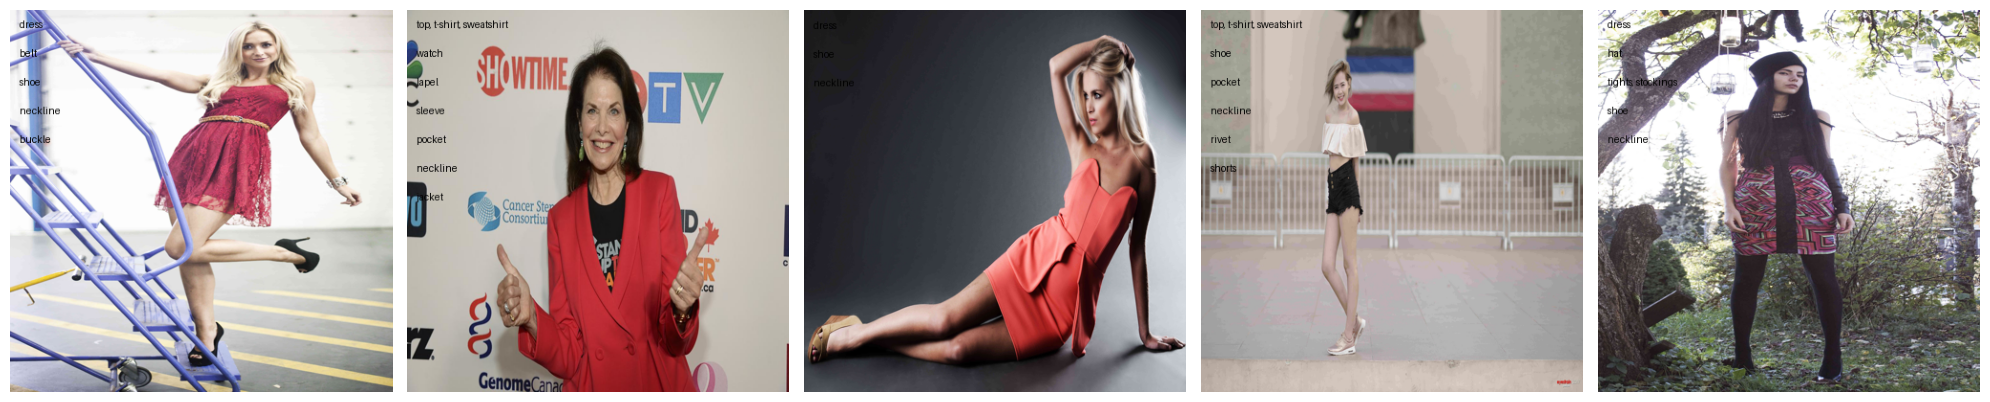

In [32]:
from PIL import Image, ImageDraw, ImageFont

# Set the number of random images to display
num_samples = 5

# Randomly select a subset of rows from the DataFrame
sample_df = df.sample(n=num_samples)

# Set the desired image size for display
image_size = (400, 400)

# Create a figure to display the images
fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))

# Iterate over the selected rows
for i, (_, row) in enumerate(sample_df.iterrows()):
    image_path = "dataset/train/" + row['ImageId']
    print(image_path)
    category_names = row['CategoryName']
    image = Image.open(image_path)
    image = image.resize(image_size)
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    labels = category_names.split('|')
    for j, label in enumerate(labels):
        draw.text((10, 10 + j * 30), label, font=font, fill=(0, 0, 0))
    
    # Display the image in the corresponding subplot
    axes[i].imshow(image)
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

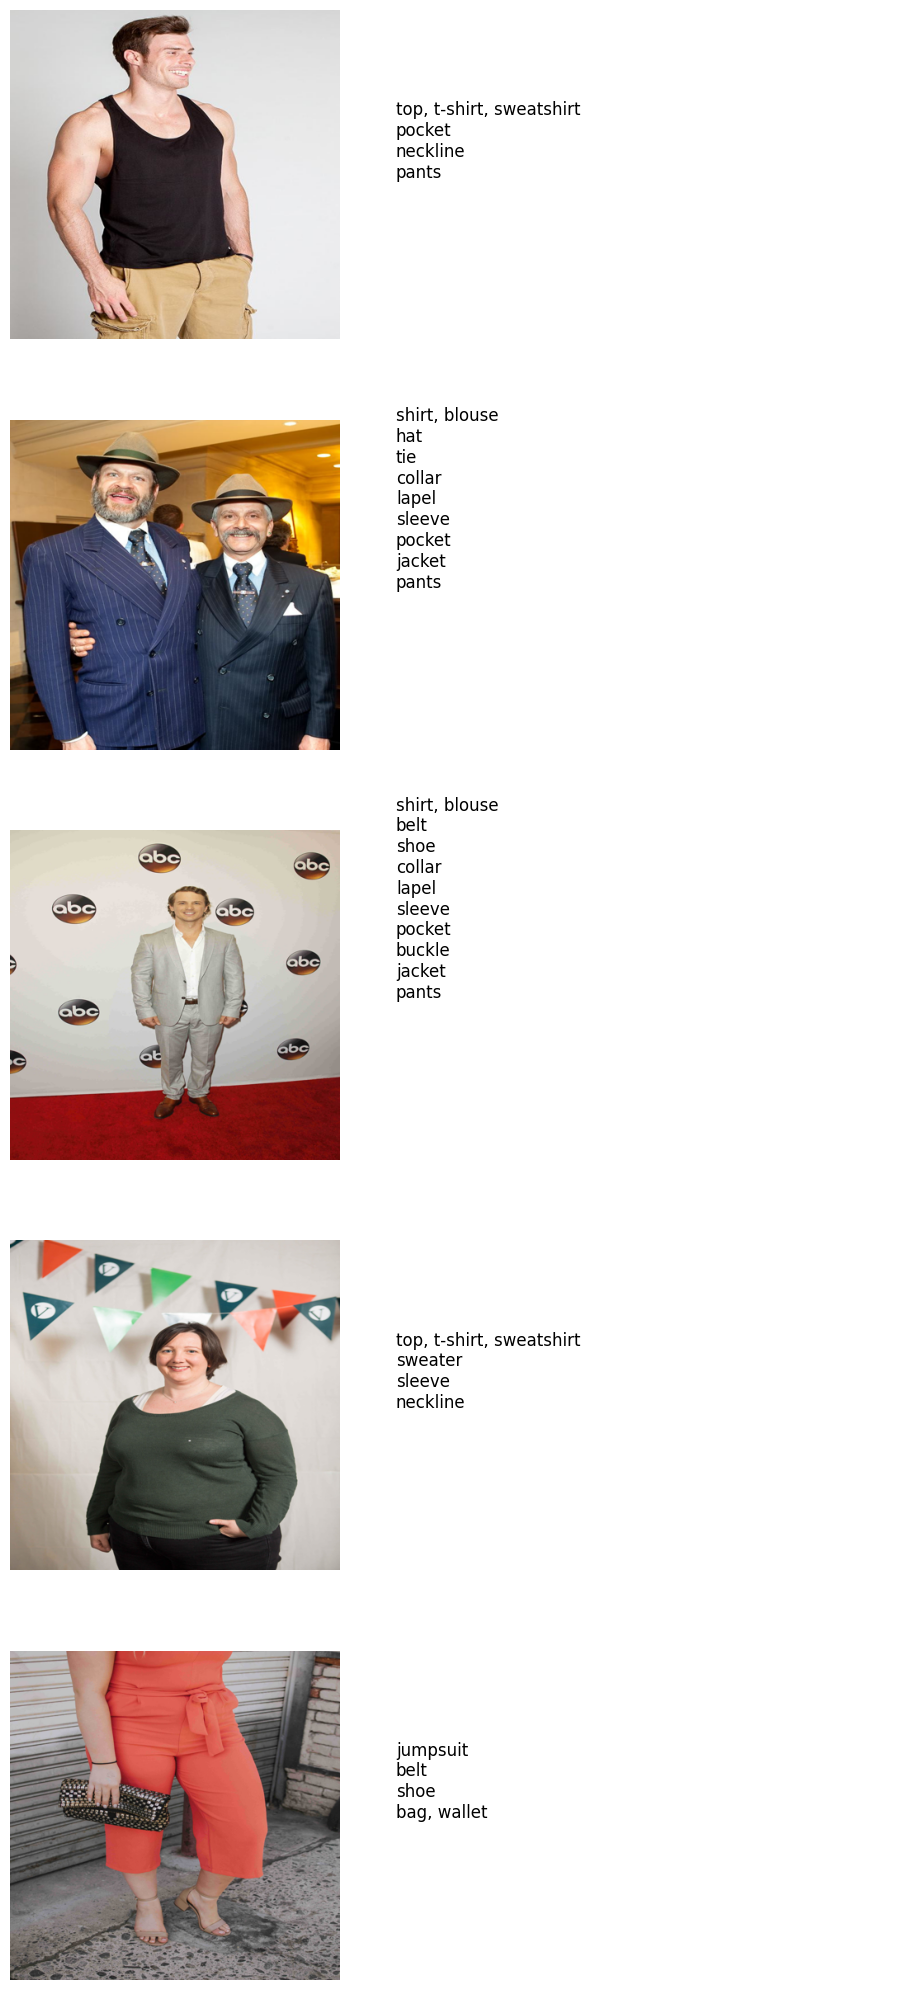

In [35]:

# Set the number of random images to display
num_samples = 5

# Randomly select a subset of rows from the DataFrame
sample_df = df.sample(n=num_samples)

# Set the desired image size for display
image_size = (400, 400)

# Create a figure to display the images
fig, axes = plt.subplots(num_samples, 2, figsize=(10, 20))

# Iterate over the selected rows
for i, (_, row) in enumerate(sample_df.iterrows()):
    image_path = "dataset/train/" + row['ImageId']
    category_names = row['CategoryName']
    
    try:
        # Open the image file
        image = Image.open(image_path)
        
        # Resize the image to the desired size
        image = image.resize(image_size)
        
        # Display the image in the corresponding subplot
        axes[i, 0].imshow(image)
        axes[i, 0].axis('off')
        
        # Display the category names in the corresponding subplot
        axes[i, 1].text(0, 0.5, "\n".join(category_names.split("|")), fontsize=12, wrap=True)
        axes[i, 1].axis('off')
        
    except Exception as e:
        print(f"Error loading image: {image_path}")
        print(f"Error message: {str(e)}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()